**BANK CUSTOMER CHURN PREDICTION - PROJECT INTRODUCTION**

Customer churn simply refers to where a customer stops doing business with a company. In banking, this usually means that a customer closes their account or stops using the bank's services.


Banks invest heavily in acquiring these customers, and losing these customers is not ideal especially profitable ones as it can significantly impact the business revenue.

Churn Prediction becomes vital because it aids retaining a customer which is cheaper than acquiring a new one, it helps identify customers likely to churn which banks can take retention measures like offering incentives or improving customer service.

This project aims to build a supervised machine learning predictive model that can classify whether a customer is likely to churn (leave) or stay, based on their attributes and activity history.

The dataset is sourced from Kaggle and contains information about bank customers, including:

* Demographic info (age, gender, geography)

* Account details (balance, number of products, credit score)

* Customer behavior (active status, tenure)

* Target variable: Exited (1 = churned, 0 = stayed)



 **1. Importing the libraries and dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score


 **2. Data Loading and Cleaning**

In [ ]:
# loading the csv data to a pandas dataframe
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.shape

(10002, 14)

The dataset contains 10002 rows and 14 columns including 1 target Churn Status column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Key Observations:**

* The dataset has 10002 rows and 14 columns.
* It contains both numerical and categorical features.
* There are missing values in Geography, Age, HasCrCard and
  IsActivMember field.
* The target variable for churn prediction is "Exited".

***a. check the unique values in each variable.***

I'm not going to check the unique features in RowID, CustomerID and Surname, as they have lots of unique values.

In [ ]:
for col in df.columns[3:]:
  print(col, df[col].unique())
  print(col, df[col].unique().size)
  print('-'*50)

CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

***b. Check and impute the missing values***

In [ ]:
df[df.isnull().any(axis= 1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


Using the mean to replace the missing value in the Age field, and the mode for the other fields.


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace= True)
df['Geography'].fillna(df['Geography'].mode()[0], inplace= True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace= True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace= True)

<ipython-input-8-2007228638>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace= True)
<ipython-input-8-2007228638>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df[df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


***c. Check for duplicates***

In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Delete the duplicates found

In [ ]:
df = df.drop_duplicates(subset = 'CustomerId', keep= 'first')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


***d. Changing the data type of Age, HasCrCard and IsActiveMember from float to integers***

In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)
df.head()

<ipython-input-13-678668266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HasCrCard'] = df['HasCrCard'].astype(int)
<ipython-input-13-678668266>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsActiveMember'] = df['IsActiveMember'].astype(int)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


Dropping RowNumber, CustomerID and Surname columns as they are not useful for modelling

In [ ]:
df = df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

3. **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.923095,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487110,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Key Observations:**

* Customers are between 18 - 92 years old and Credit Score varies from 350 to 850, with an average of 650.
* Each Customer has at least one bank product they use, and the max being 4.
* Customer salaries range between 11.58 and 199,992, with an average of 100,090.
* The number of years the customer has been with the bank is between 0 - 10 years.

***a. Analysis on Numerical Features***

To check and understand the distribution of the numerical variables

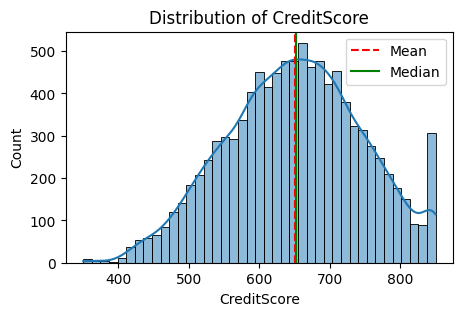

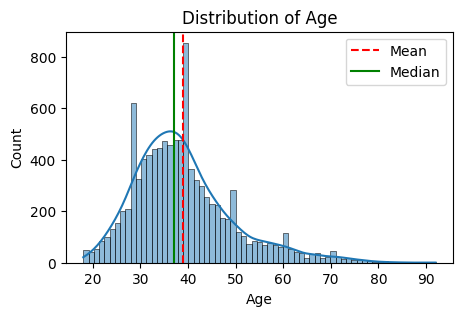

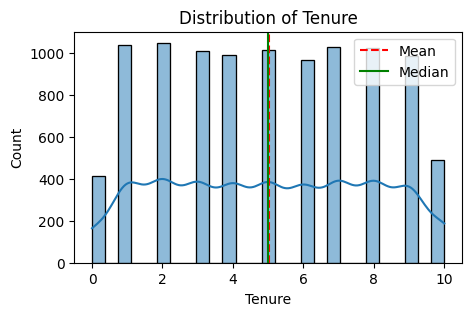

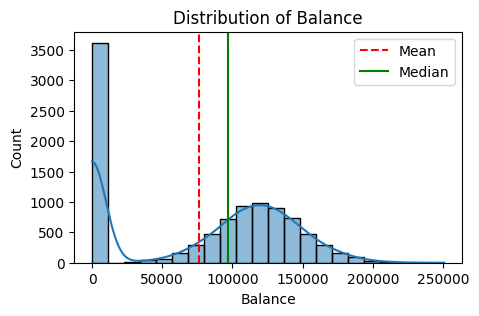

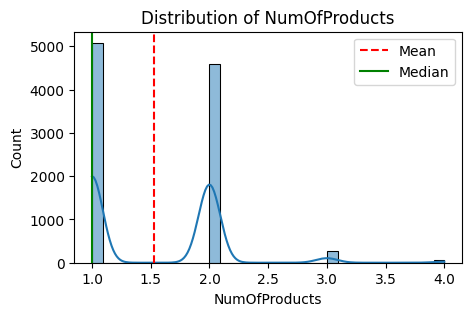

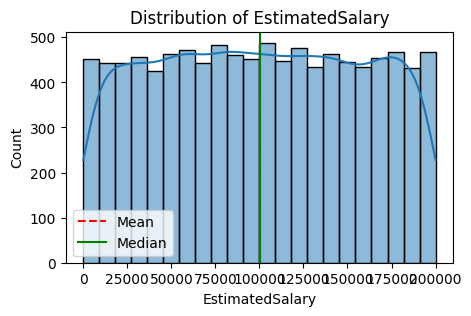

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in num_cols:

  plt.figure(figsize= (5,3))
  sns.histplot(data= df, x= col, kde= True)
  plt.title(f'Distribution of {col}')

  # also want to calculate the mean and median
  df_mean = df[col].mean()
  df_median = df[col].median()

  # add vertical lines for mean and median
  plt.axvline(df_mean, color= 'red', linestyle= 'dashed', label = 'Mean')
  plt.axvline(df_median, color= 'green', linestyle= 'solid', label = 'Median')

  # add legends
  plt.legend()
  plt.show()

**The histogram provides insights into the distribution of numerical variables:**

* **Right-Skewed Distribution:** Age exhibits a righ-skewness which might be caused by the smaller proportion of older customers. The Number of Products  exhibit a more discrete distribution, likely due to predefined rating scales, and show a concentration towards a certain rate .

* **Uniform-Like Distribution:** Features such as Tenure and Estimated Salary appear to have a relatively uniform (even and consistent) spread rather than forming a normal distribution. Credit Score appears to be approximately normal, with a slight right skewness indidcating a healthy customer base

* **Bimodal:** The Customer balance shows two customer groups, one with zero balance and another with substantial balance.

Check for outliers in the numerical features

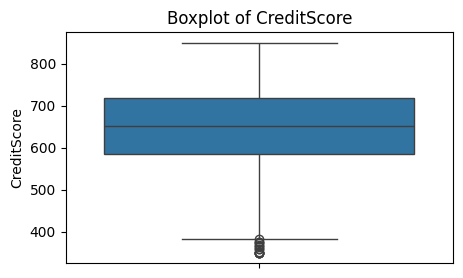

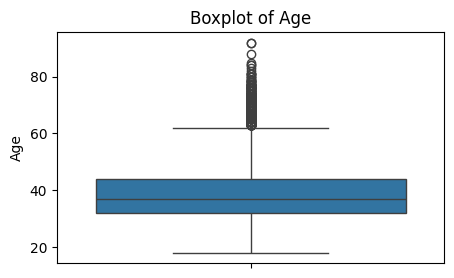

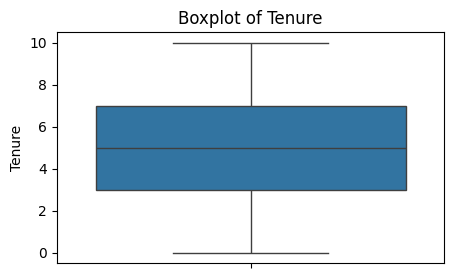

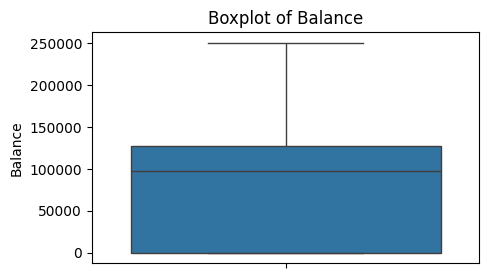

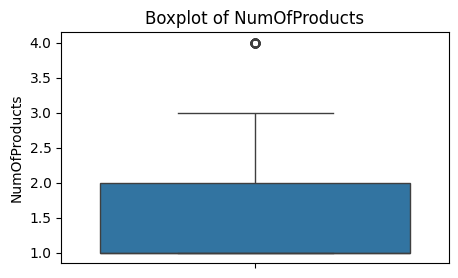

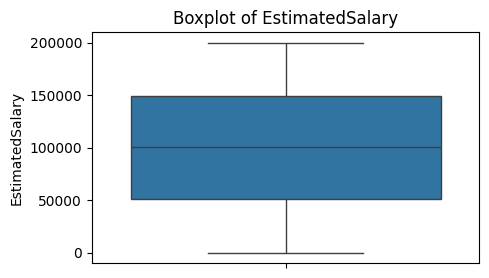

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in num_cols:

  plt.figure(figsize= (5,3))
  sns.boxplot(data = df, y= df[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()

In [ ]:
def find_outliers_IQR(df):

   Q1 = df.quantile(0.25)

   Q3 = df.quantile(0.75)

   IQR = Q3 - Q1

   # Define lower and upper bounds using IQR (interquartile range)
   lower_bound = Q1 -( 1.5 * IQR)
   upper_bound = Q3 + (1.5 * IQR)

   # Filter and show outlier values of Age
   outliers = df[((df< lower_bound) | (df> upper_bound))]
   outlier_count = outliers.shape[0]
   outlier_percentage = 100 * outlier_count / df.shape[0]


   print(f'{[col]}: Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, lb = {lower_bound}, up = {upper_bound}')
   print(f'{[col]}: has {outlier_count} (outliers {round(outlier_percentage, 2)}%)')
   return outliers

In [ ]:
for col in df[['CreditScore', 'Age', 'NumOfProducts']]:
  outliers = find_outliers_IQR(df[col])

  print(f'max outlier value: {outliers.max()}')
  print(f'min outlier value: {outliers.min()}')
  print('-' *50)

  #print(outliers.sort_values())

['CreditScore']: Q1 = 584.0, Q3 = 718.0, IQR = 134.0, lb = 383.0, up = 919.0
['CreditScore']: has 15 (outliers 0.15%)
max outlier value: 382
min outlier value: 350
--------------------------------------------------
['Age']: Q1 = 32.0, Q3 = 44.0, IQR = 12.0, lb = 14.0, up = 62.0
['Age']: has 359 (outliers 3.59%)
max outlier value: 92.0
min outlier value: 63.0
--------------------------------------------------
['NumOfProducts']: Q1 = 1.0, Q3 = 2.0, IQR = 1.0, lb = -0.5, up = 3.5
['NumOfProducts']: has 60 (outliers 0.6%)
max outlier value: 4
min outlier value: 4
--------------------------------------------------


The outliers are not relatively high, i can either drop or replace them. I will replace the Age with the median and ignore the outliers in the CreditScore and NumofProducts fields just to keep a decent number of data for modelling.

In [ ]:
# Replacing the outlier with the median

def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.median(),

       np.where(

           df < lower,

           df.median(),

           df

           )

       )

   return df

In [ ]:
df['Age'] = impute_outliers_IQR(df['Age'])

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,37.764595,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,8.644232,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,43.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,62.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Convert Age datatype from float to integer

In [ ]:
df['Age'] = df['Age'].astype(int)
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Heatmap to get correlation between the numerical features. It helps identify relationships or patterns between features that might influence the model or highlight redundant information.

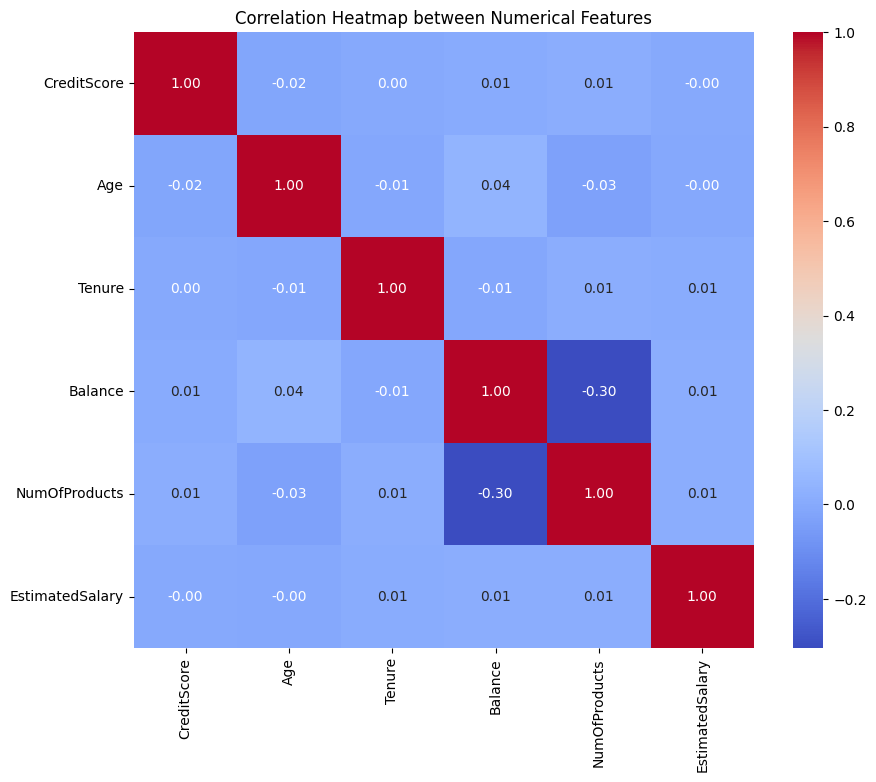

In [ ]:
# heatmap to get correlation between the numerical features
plt.figure(figsize= (10,8))
sns.heatmap(df[num_cols].corr(), annot= True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

**Insights from Heat Map Correlation**

* Most features have weak or no correlation with each other (~0.00 to 0.04). these features don’t strongly influence each other linearly and are likely to bring unique information.

* Balance and NumOfProducts have the most notable (but still moderate) relationship but their correlation is not strong enough to cause concern like multicollinearity. They have a slight negative correlation (-0.30), as the number of products increases, balance decreases a bit.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


***b. Analysis on Categorical data***

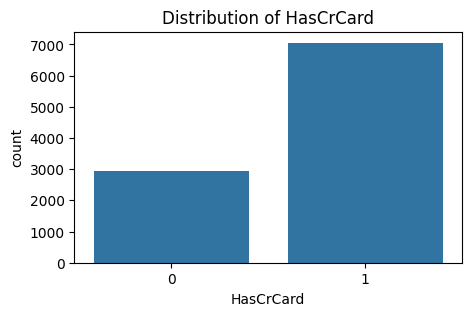

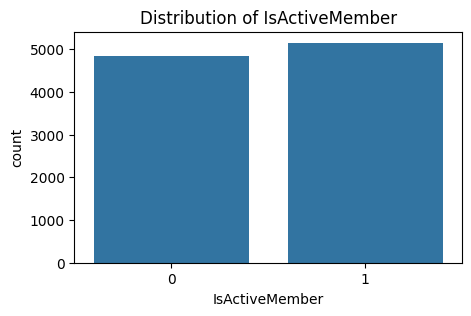

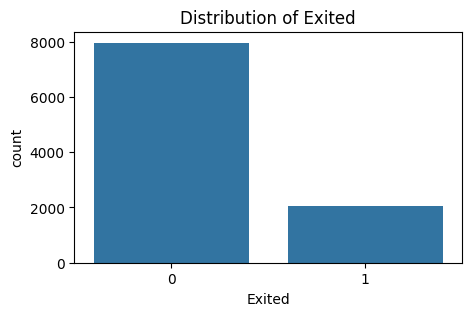

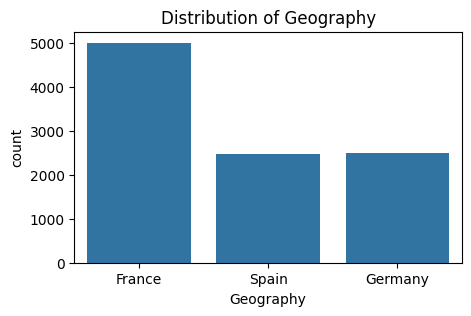

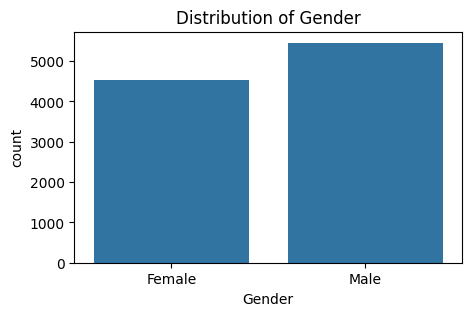

In [ ]:
categorical_data = df.select_dtypes(include= 'object').columns.to_list()
categorical_data = ['HasCrCard'] + ['IsActiveMember'] + ['Exited'] + categorical_data

for col in categorical_data:
  plt.figure(figsize= (5,3))
  sns.countplot(data= df, x= col)
  plt.title(f'Distribution of {col}')
  plt.show()

There's an imbalance in the Exited field, which can affect the model performance.

Techniques will be applied like Class weighting and SMOTE to address this imbalance, and comparing each technique performance.

**4. Feature Engineering**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

***a. One Hot Encoding on Categorical Features***

In [ ]:
 # One Hot Encoding the "Geography" and "Gender" column.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


***b. Train and Test Data***

In [ ]:
# Splitting the dataset into the training and test data. Feature scaling is applied to only training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

***c. Standardise the numerical features***

In [ ]:
mask = (X < 0) | (X > 1)
cols_not_0_1 = np.any(mask, axis=0)
print(cols_not_0_1)
print("Columns with values not between 0 and 1:", np.where(cols_not_0_1)[0])
X_to_standardize = X[:, cols_not_0_1]

[False False False False False  True  True  True  True  True False False
  True]
Columns with values not between 0 and 1: [ 5  6  7  8  9 12]


In [ ]:
#Feature scaling
sc = StandardScaler()
X_train[:, cols_not_0_1] = sc.fit_transform(X_train[:, cols_not_0_1])
X_test[:, cols_not_0_1] = sc.transform(X_test[:, cols_not_0_1])

In [ ]:
X_train

array([[1.0, 0.0, 0.0, ..., 1, 0, 1.0420839163089097],
       [0.0, 1.0, 0.0, ..., 1, 0, -0.6235563523471637],
       [0.0, 1.0, 0.0, ..., 1, 1, 0.3081277876179915],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 1, -0.5580876686277955],
       [0.0, 0.0, 1.0, ..., 1, 0, -1.35149955966542],
       [0.0, 0.0, 1.0, ..., 0, 1, -1.0269221581581174]], dtype=object)

**5. Model Selection and Training**

The two models i'll be using are

*   LGBMClassifier
*   XGBClassifier

***a. Default parameters and Class Imbalance***

Training the models with default parameters and class imbalance

In [ ]:
# creating a dictionary for the models
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

baseline_models = {
    'LGBMClassifier': LGBMClassifier(random_state= 42),
    'XGBClassifier': XGBClassifier(random_state= 42, use_label_encoder = False, eval_metric = 'logloss'),
}

Applying k-folds validation

In [ ]:
# Applying k-fold validation on each model

from sklearn.model_selection import StratifiedKFold, cross_val_score
accuracy_scores = {}
precision_scores = {}
recall_scores = {}


for model_name, model in baseline_models.items():
  accuracy_scores[model_name] = cross_val_score(model, X_train, y_train, cv= 10 , scoring= 'accuracy')
  print(f'{model_name}: accuracy_mean {accuracy_scores[model_name].mean()}')
  print(f'{model_name}: accuracy_std {accuracy_scores[model_name].std()}')
  print(accuracy_scores[model_name])
  print('-'*50)

[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
LGBMClassifier: accuracy_mean 0.8593750000000002
LGBMClassifier: accuracy_std 0.01158190938489851
[0.85125 0.85875 0.85    0.87375 0.8375  0.85375 0.8625  0.8575  0.8725
 0.87625]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not

XGBClassifier: accuracy_mean 0.852
XGBClassifier: accuracy_std 0.0112805141726785
[0.85    0.83875 0.84625 0.8625  0.84    0.84875 0.8575  0.83875 0.865
 0.8725 ]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing the models with default parameters and class imbalance

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
LGBMClassifier
Accuracy: 
 0.8585

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


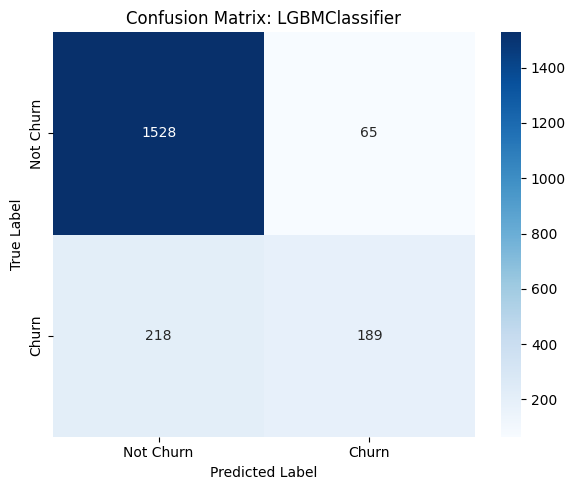

----------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier
Accuracy: 
 0.838

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.64      0.47      0.54       407

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



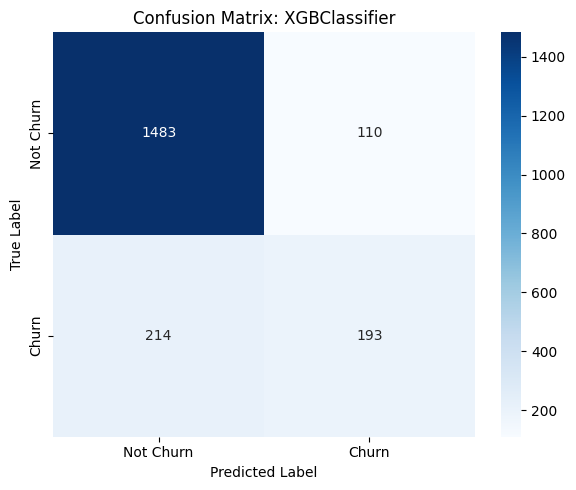

----------------------------------------------------------------------


In [ ]:
for model_name, model in baseline_models.items():
  model.fit(X_train, y_train)
  baseline_model_pred = model.predict(X_test)

  print(model_name)
  print(f'Accuracy: \n', accuracy_score(y_test, baseline_model_pred))
  cm = confusion_matrix(y_test, baseline_model_pred)
  print("\nClassification Report:")
  print(classification_report(y_test, baseline_model_pred))
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
  xticklabels=["Not Churn", "Churn"],
  yticklabels=["Not Churn", "Churn"])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.tight_layout()
  plt.show()
  print('-'*70)

EVALUATION OF BASELINE MODELS

***LGBM MODEL***

 1. **Accuracy** :- The overall model **Accuracy** is 0.86, the model is able to correctly predict 86% of the total customers, whether they churn or not.

 2. **Precision Score** :-The model is able to **correctly predict 88%** of staying customers (class/label 0), and **correctly predict 74%** of customers who churn (class/label 1).

 3. **Recall Score** :- Out of all **customers who actually stay** (class/label 0), the model was able to **correctly identify and label 96%** of them, and out of all **customers who actually churn/leaves** (class/label 1), the model was able to **correctly identify and label 46%** of them.

 4. **F1-Score** :- The model has a high ability to recognise customers who stay (92%) and moderate ability to recognize customers who churn (57%)

 ***XGB MODEL***

 1. **Accuracy** :- The overall model **Accuracy** is 0.84, the model is able to correctly predict 84% of the total customers, whether they churn or not.

 2. **Precision Score** :-The model is able to **correctly predict 87%** of staying customers (class/label 0), and **correctly predict 64%** of customers who churn (class/label 1).

 3. **Recall Score** :- Out of all **customers who actually stay** (class/label 0), the model was able to **correctly identify and label 93%** of them, and out of all **customers who actually churn/leaves** (class/label 1), the model was able to **correctly identify and label 47%** of them.

 4. **F1-Score** :- The model has a high ability to recognise customers who stay (90%) and moderate ability to recognize customers who churn (54%).


**Conclusions**

 Both models have a high performance in predicting and identifying staying customers, however LGBM outperforms XGBoost in predicting leaving customers while XGBOOST slightly outperforms LGBM in identifying those customers who churn.

 The scores that need to improve are:

 ***LGBM***

 1. Recall score for class/label 1 (churn) = 46%
 2. F1-score for class/label 1 (churn) = 57%

 ***XGB***

 1. Precision score for class/label 1 (churn) = 64%
 2. Recall score for class/label 1 (churn) = 47%
 3. F1-score for class/label 1 (churn) = 54%



***b. Using Class Weighting and Default Parameters***

Class weight to balance the class imbalance for each model

In [ ]:
# ratio = number of negative / number of positive samples for XGBClassifier
ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

# creating a dictionary for the models

models_class_weight = {
    'LGBMClassifier': LGBMClassifier(random_state= 42, class_weight = 'balanced'),
    'XGBClassifier': XGBClassifier(random_state= 42, scale_pos_weight = ratio, use_label_encoder = False, eval_metric = 'logloss')
}

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LGBMClassifier
Accuracy: 
 0.8095

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.71      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


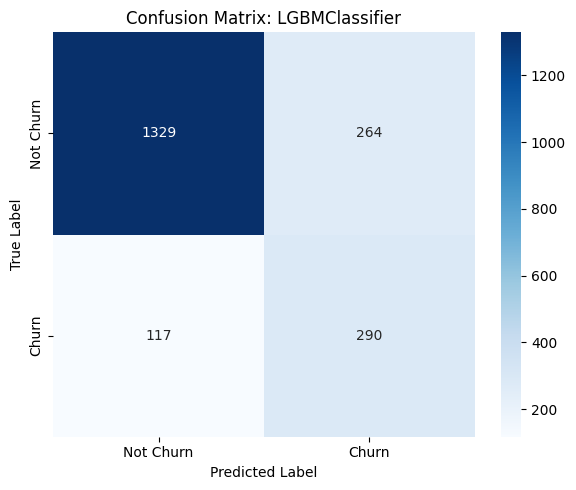

----------------------------------------------------------------------
XGBClassifier
Accuracy: 
 0.8155

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1593
           1       0.54      0.58      0.56       407

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.82      0.82      0.82      2000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


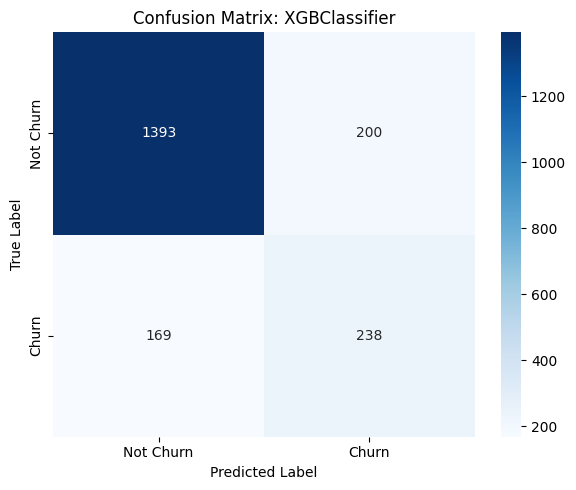

----------------------------------------------------------------------


In [ ]:
from sklearn.utils import compute_sample_weight

for model_name, model in models_class_weight.items():
  model.fit(X_train, y_train)

  class_weight_pred = model.predict(X_test)


  print(model_name)
  print(f'Accuracy: \n', accuracy_score(y_test, class_weight_pred))
  cm = confusion_matrix(y_test, class_weight_pred)
  print("\nClassification Report:")
  print(classification_report(y_test, class_weight_pred))
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
  xticklabels=["Not Churn", "Churn"],
  yticklabels=["Not Churn", "Churn"])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.tight_layout()
  plt.show()
  print('-'*70)


EVALUATION OF CLASS WEIGHT MODEL & COMPARISON TO BASELINE MODEL  

***LGBM MODEL***

1. **Accuracy** :- There's a slight decrease of overall accuracy from 86% to 81%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 88% to 92%.

 2. **Recall Score** :- The model decreased significantly from 96% to 83%, although 83% is quite acceptable and a good score.

 3. **F1-Score** :- The model slightly decreases from 92% to 87%, still a good score and doesn't improvement.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a significant decrease from 74% to 52%, this needs improvement.

 2. **Recall Score** :- The model significantly increased from 46% to 71%.

 3. **F1-Score** :- The model slightly increases from 57% to 60%





***XGB MODEL***

 1. **Accuracy** :- There's a slight decrease of overall accuracy from 86% to 82%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 87% to 89%.

 2. **Recall Score** :- The model decreased from 93% to 87%, 87% is quite acceptable and a good score.

 3. **F1-Score** :- The model slightly decreases from 90% to 88%, still a good score and doesn't improvement.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a significant decrease from 64% to 54%, this needs improvement.

 2. **Recall Score** :- The model significantly increased from 47% to 58%.

 3. **F1-Score** :- The model slightly increases from 54% to 56%

**Conclusions**

 Both models still have a high performance in predicting and identifying staying customers, however LGBM now outperforms XGBoost in identifying leaving customers while XGBOOST slightly outperforms LGBM in predicting those customers who churn.

 The scores that need to improve are:

 ***LGBM***

 1. Precision score for class/label 1 (churn) = 52%
 2. F1-score for class/label 1 (churn) = 60%

 ***XGB***

 1. Precision score for class/label 1 (churn) = 54%
 2. Recall score for class/label 1 (churn) = 58%
 3. F1-score for class/label 1 (churn) = 56%

 SYNTHETIC MINORITY OVERSAMPELLING TEchnique (SMOTE)

***c. SMOTE and Default Parameter***

In [ ]:
smote = SMOTE(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
unique_values, counts = np.unique(y_train_smote, return_counts=True)
print(unique_values)
print(counts)

[0 1]
[6370 6370]


In [ ]:
y_train_smote

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
# creating a dictionary for the models

models_smote = {
    'LGBMClassifier': LGBMClassifier(random_state= 42),
    'XGBClassifier': XGBClassifier(random_state= 42, use_label_encoder = False, eval_metric = 'logloss')
}

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier
Accuracy: 
 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.69      0.57      0.62       407

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


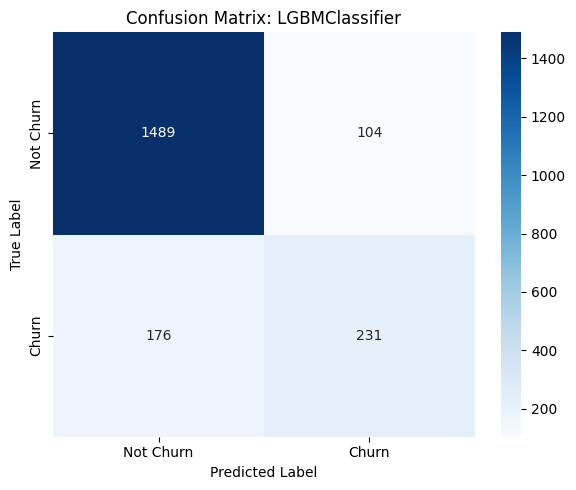

----------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier
Accuracy: 
 0.8435

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.53      0.58       407

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



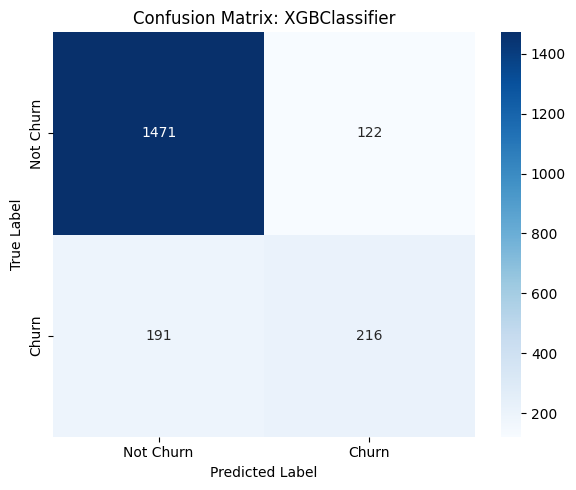

----------------------------------------------------------------------


In [ ]:
for model_name, model in models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  smote_pred = model.predict(X_test)

  print(model_name)
  print(f'Accuracy: \n', accuracy_score(y_test, smote_pred))
  cm = confusion_matrix(y_test, smote_pred)
  print("\nClassification Report:")
  print(classification_report(y_test, smote_pred))
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
  xticklabels=["Not Churn", "Churn"],
  yticklabels=["Not Churn", "Churn"])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.tight_layout()
  plt.show()
  print('-'*70)

EVALUATION OF SMOTE MODEL & COMPARISON TO BASELINE MODEL  

***LGBM MODEL***

1. **Accuracy** :- Accuracy remains stagnant at 86%

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 88% to 89%.

 2. **Recall Score** :- The model slightly decrease from 96% to 93%.

 3. **F1-Score** :- The model slightly decreases from 92% to 91%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a slight decrease from 74% to 69%. This outperforms the class weight model (52%).

 2. **Recall Score** :- The model significantly increased from 46% to 57%, although the class weight model performs better with a higher score of 71%.

 3. **F1-Score** :- The model slightly increases from 57% to 62%.



***XGB MODEL***

 1. **Accuracy** :- There's a slight decrease of overall accuracy from 86% to 84%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 87% to 89%.

 2. **Recall Score** :- The model decreased from 93% to 92%.

 3. **F1-Score** :- The model remains stagnant at 90%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- The model remains stagnant at 64%.

 2. **Recall Score** :- The model significantly increased from 47% to 53%.

 3. **F1-Score** :- The model slightly increases from 54% to 58%

**Conclusions**

 Both models still have a high performance in predicting and identifying staying customers. LGBM and XGBoost performs better when SMOTE is applied on both models compared to balancing the class with class weighting.
 The scores that need to improve are:

 ***LGBM***

 1. Recall score for class/label 1 (churn) = 57%
 2. F1-score for class/label 1 (churn) = 62%

 ***XGB***

 1. Recall score for class/label 1 (churn) = 53%
 2. F1-score for class/label 1 (churn) = 58%

***d. Class Weight and HyperParameter Tuning (improving f1 score)***

In [ ]:
param_grids = {
    'LGBMClassifier': {
        'num_leaves': [20, 31, 50, 100],
        'max_depth': [-1, 5, 10, 15],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 200,300],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    },
    'XGBClassifier': {
        'n_estimators': [50 ,100, 200,300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10,16],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.5, 1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0.5, 1, 1.5]
    }

}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Best Parameters for LGBMClassifier: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Score for LGBMClassifier: 0.6109900705111245
Best Estimator for LGBMClassifier: LGBMClassifier(class_weight='balanced', colsample_bytree=0.8, max_depth=10,
               random_state=42, reg_alpha=0.5, reg_lambda=0.5, subsample=0.8)
Confusion Matr

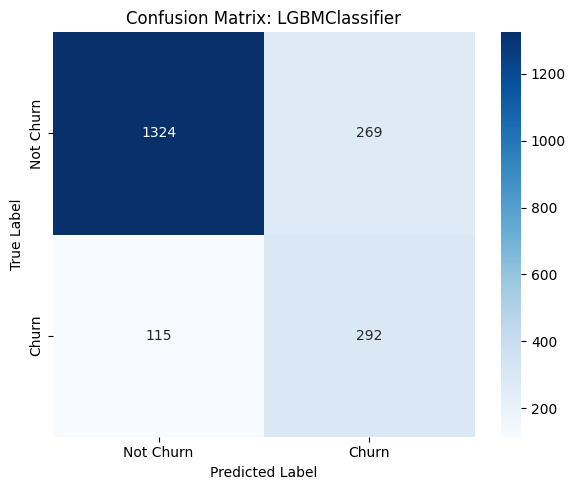

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:27:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBClassifier: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score for XGBClassifier: 0.6132283934919567
Best Estimator for XGBClassifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, nu

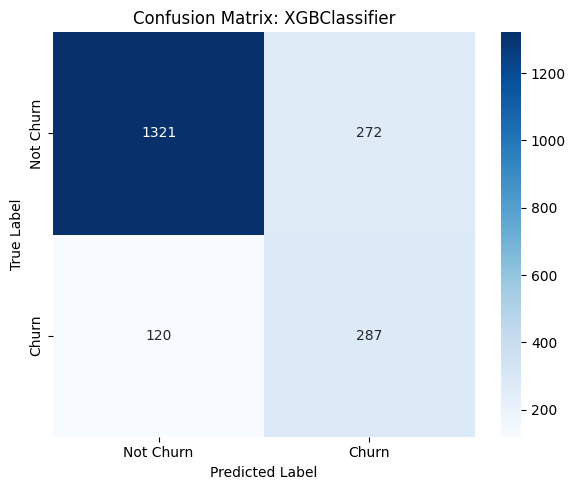

--------------------------------------------------


In [ ]:
# Perform RandomizedSearchCV for each model using its specific parameter grid
for model_name, model in models_class_weight.items():
    # Get the correct parameter grid for the current model
  parameter = param_grids[model_name]

  # Use RandomizedSearchCV with the specific parameter grid
  search = RandomizedSearchCV(estimator=model, param_distributions=parameter, n_iter=50, cv=5, scoring='f1', n_jobs=-1)
  search.fit(X_train, y_train)

  best_params = search.best_params_
  best_score = search.best_score_
  best_model = search.best_estimator_

  tuned_class_weight = best_model.predict(X_test)
  cm = confusion_matrix(y_test, tuned_class_weight)

  # Print the results
  print(f'Best Parameters for {model_name}: {best_params}')
  print(f'Best Score for {model_name}: {best_score}')
  print(f'Best Estimator for {model_name}: {best_model}')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, tuned_class_weight))
  print("\nClassification Report:")
  print(classification_report(y_test, tuned_class_weight))
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.tight_layout()
  plt.show()
  print('-'*50)

EVALUATION OF TUNED MODELS & CLASS WEIGHT

The aim of applying class weight was to address the class imbalance in order to improve the F1 and Recall scores.

***LGBM MODEL***

1. **Accuracy** :- Accuracy decreases from 86% to 81%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 88% to 91%.

 2. **Recall Score** :- The model slightly decrease from 96% to 84%.

 3. **F1-Score** :- The model slightly decreases from 92% to 88%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a significant decrease from 74% to 53%.

 2. **Recall Score** :- The model significantly increased from 46% to 69%.

 3. **F1-Score** :- The model slightly increases from 57% to 60%.



***XGB MODEL***

 1. **Accuracy** :- There's a slight decrease of overall accuracy from 86% to 82%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 87% to 91%.

 2. **Recall Score** :- The model decreased from 93% to 86%.

 3. **F1-Score** :- There's a slight decrease from 90% to 89%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a slight decrease from 64% to 56%.

 2. **Recall Score** :- The model significantly increased from 47% to 68%.

 3. **F1-Score** :- The model increases from 54% to 61%.

**Conclusions**

 Both models still have a high performance in predicting and identifying staying customers. LGBM performs slighlty better with the hyperparameters applied.



***e. SMOTE and HyperParameter Tuning***

Using the same HyperParameter as with Class Weight

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Parameters for LGBMClassifier: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'num_leaves': 100, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best Score for LGBMClassifier: 0.8753443477018612
Best Estimator for LGBMClassifier: LGBMClassifier(learning_rate=0.05, max_depth=15, n_estimators=300,
               num_leaves=100, random_state=42, reg_alpha=0, reg_lambda=0.5,
               subsample=0.6)
Confusion Matrix:
[[1481  112]
 [ 206  201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.64      0.49      0.56       407

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



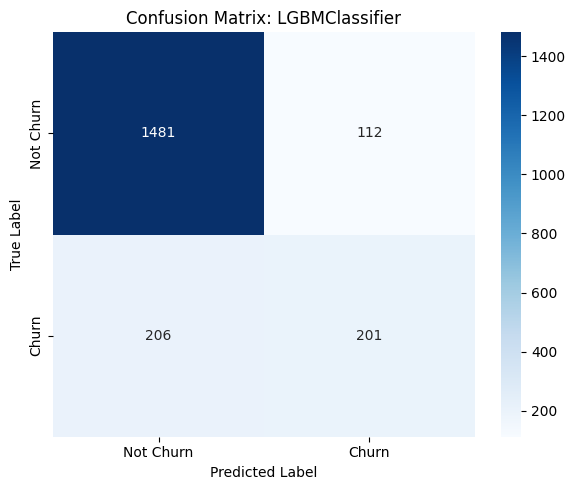

--------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBClassifier: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 16, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best Score for XGBClassifier: 0.8917209227043206
Best Estimator for XGBClassifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=16,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, nu

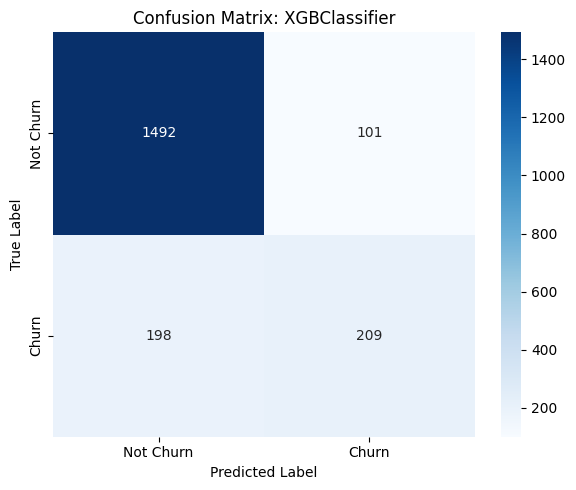

--------------------------------------------------


In [ ]:
# Perform RandomizedSearchCV for each model using its specific parameter grid
for model_name, model in models_smote.items():

  # Get the correct parameter grid for the current model
  parameter = param_grids[model_name]

  # Handle XGBoost specific parameter

  # Use RandomizedSearchCV with the specific parameter grid
  search_smote = RandomizedSearchCV(estimator= model, param_distributions=parameter, n_iter=50, cv=5, scoring='f1', n_jobs=-1, verbose=1)

  search_smote.fit(X_train_smote, y_train_smote)
    #search.fit(X_train, y_train)

  best_params_smote = search_smote.best_params_
  best_score_smote = search_smote.best_score_
  best_model_smote = search_smote.best_estimator_

  smote_grid_pred = best_model_smote.predict(X_test)
  cm = confusion_matrix(y_test, smote_grid_pred)

    # Print the results
  print(f'Best Parameters for {model_name}: {best_params_smote}')
  print(f'Best Score for {model_name}: {best_score_smote}')
  print(f'Best Estimator for {model_name}: {best_model_smote}')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, smote_grid_pred))
  print("\nClassification Report:")
  print(classification_report(y_test, smote_grid_pred))
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churn", "Churn"],
                yticklabels=["Not Churn", "Churn"])
  plt.title(f"Confusion Matrix: {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.tight_layout()
  plt.show()
  print('-'*50)



EVALUATION OF TUNED MODELS & SMOTE

The aim of applying class weight was to address the class imbalance in order to improve the F1 and Recall scores.

***LGBM MODEL***

1. **Accuracy** :- There's a slight decrease from 86% to 85%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's no change, remains at 88%.

 2. **Recall Score** :- The model slightly decrease from 96% to 94%.

 3. **F1-Score** :- The model slightly decreases from 92% to 91%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a significant decrease from 74% to 68%.

 2. **Recall Score** :- The model slightly increased from 46% to 52%.

 3. **F1-Score** :- The model remains stagnant at 59%.



***XGB MODEL***

 1. **Accuracy** :- There's a slight decrease of overall accuracy from 86% to 84%.

         Class 0 - Customers who stays


 1. **Precision Score** :-There's a slight increase from 87% to 88%.

 2. **Recall Score** :- The model slightly icreased from 93% to 92%.

 3. **F1-Score** :- The model remains stagnant at 90%.

         Class 1 - Customers who leaves


 1. **Precision Score** :- There's a slight decrease from 64% to 63%.

 2. **Recall Score** :- The model slightly increased from 47% to 52%.

 3. **F1-Score** :- The model slightly increases from 54% to 57%.

**Conclusions**

 Both models still have a high performance in predicting and identifying staying customers. They're both good at predicting churned customers (precision) but not classifying them (recall).

**6.Model Comparisons**

The models to be compared are as follows

* Baseline LGBM Model

* Baseline XGBoost Model

* LGBM + Class Weighting

* XGBoost + Class Weighting

* LGBM + SMOTE

* XGBoost + SMOTE

* Tuned LGBM + Class Weighting

* Tuned XGBoost + Class Weighting

* Tuned LGBM + SMOTE

* Tuned XGBoost + SMOTE

   

**a. BASELINE LGBM MODEL**

***Confusion Matrix***

       [[1528  65]

       [218   189]]

***Classification Report: (Overall accuracy 0.86)***

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.46      0.57       407

This model is very good in predicting customers who churn but not quite good in identifying those customers that do churn. It is not a strong model in balancing Precision and Recall for churn detection. It has less False Positives and more False Negative. It predicts more churners as not-churned which can be costly to the business and lead to revenue loss.

**b. BASELINE XGBOOST MODEL**

***Confusion Matrix***

      [[1483  110]
      [214  193]]

***Classification Report: (Overall accuracy is 0.84)***

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1593
           1       0.64      0.47      0.54       407

This model is outperformed by the Baseline LGBM Model in predicting churned customers, and has less balance in precisison and recall. Still a  high number of False Negative, but slightly better than the LGBM Model.

**c. LGBM MODEL + CLASS WEIGHTING**

***Confusion Matrix***

      [[1329  264]
      [117  290]]

***Classification Report: (Overall accuracy 0.81)***

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.71      0.60       407

This model is strong in balancing Precision and Recall for the class/label 1. The number of False Positives and True Positives in this model are significantly higher than the baseline models, but significantly less False Negatives, making this model suitable if retention cost is not high, that is the cost of retaining and keeping existing customers who leave is not high (i.e., discount, offers, calls). Lower False Negatives comes with a trade-off of higher False Negatives.

**d. XGBOOST MODEL + CLASS WEIGHTING**

***Confusion Matrix***

      [[1393  200]
      [169  238]]

***Classification Report: (Overall accuracy 0.82)***

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1593
           1       0.54      0.58      0.56       407

The LGBM Model + class weighting outperforms this model, it is not quite robust in balancing Precision and Recall. There's higher False Negatives  compared to the LGBM + Class Weighting Model.

**e. LGBM MODEL + SMOTE**

***Confusion Matrix***

      [[1489  104]
      [176  231]]

***Classification Report: (Overall accuracy 0.86)***

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.69      0.57      0.62       407

This model is more robust in balancing Precision and Recall for the class/label 1, although there are higher False Negatives than False Positives, which means there's more risk of losing a customer which can lead to revenue loss.

**f. XGBOOST MODEL + SMOTE**

***Confusion Matrix***

      [[1471  122]
      [191  216]]

***Classification Report: (Overall accuracy 0.84)***

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.53      0.58       407

This Model does not have a good performance, there's higher False Negatives which is costly to the business, making this model not idea for the business problem.

**g. TUNED LGBM + CLASS WEIGHTING**

***Confusion Matrix***

       [[1340  253]
       [127  280]]

***Classification Report: (Overall accuracy 0.81)***

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1593
           1       0.53      0.69      0.60       407

This model performs quite well in balancing Precision and Recall, however the number of False Negatives is a little higher than the LGBM + Class Weight Model. These little higher FN comes with a trade-off of lower False Positives, which can be reduce retention cost and raising less false alarms while also preventing high revenue loss.
  

**g. TUNED XGBOOST + CLASS WEIGHTING**

***Confusion Matrix***

       [[1374  219]
       [ 132  275]]

***Classification Report: (Overall accuracy 0.81)***
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.56      0.68      0.61       407

This model is robust in balancing Precision and Recall, however the number of False Negatives is a little higher than the LGBM + Class Weight Model and Tuned LGBM + Class Weight Models. These little higher FN comes with a trade-off of lower False Positives which is tolerable for some business. This trade-off is moderate as the number of False Negatives has not incresed significantly, yet it has significantly reduced the False Positives.


**h. TUNED LGBM & SMOTE**

***Confusion Matrix:***

        [[1494   99]
        [208  199]]

***Classification Report: (Overall accuracy 0.85)***

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.67      0.49      0.56       407

This Model does not have a good performance, there's high False Negatives and less True Positives.

**TUNED XGBOOST & SMOTE**

***Confusion Matrix:***

       [[1484  109]
       [ 194  213]]

***Classification Report: (Overall accuracy 0.85)***

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1593
           1       0.66      0.52      0.58       407

This Model does not have a good performance, there's high False Negatives and less True Positives.

**6. Model Selection**

For this project, i will use the Tuned XGBOOST + Class Weight Model because of the balance it brings between the False Positives and False Negatives. If the business prioritise catching more churners with the risk of high rate of false alarms, the LGBM + Class Weight is recommended. The selected model for this project significantly lowers the rate of false alarms by slightly increasing false negatives, this trade-off is acceptable, as it reduces retention waste while still catching a significant amount of churners.

In [ ]:
Best_Parameter_XGBoost= {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10,
                         'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
# ratio = number of negative / number of positive samples for XGBClassifier
ratio = np.sum(y_train == 0) / np.sum(y_train == 1)

# creating a dictionary for the models
selected_model = XGBClassifier(random_state= 42, scale_pos_weight = ratio, use_label_encoder = False, eval_metric = 'logloss', subsample = 0.7,
                               reg_lambda = 1, reg_alpha = 0, n_estimators = 100, min_child_weight = 3, max_depth = 10, learning_rate = 0.01,
                               gamma = 0.1, colsample_bytree = 0.8)


In [ ]:
best_model = selected_model.fit(X_train, y_train)

best_model_pred = best_model.predict(X_test)

# Classification Repor
print("XGBOOST Performance:")
print(classification_report(y_test, best_model_pred))
print('-'*50)

# Confusion Matrix
print("XGBOOST Confusion Matrix:")
print(confusion_matrix(y_test, best_model_pred))
print('-'*50)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOOST Performance:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.56      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000

--------------------------------------------------
XGBOOST Confusion Matrix:
[[1374  219]
 [ 132  275]]
--------------------------------------------------


**PR Curve Analysis for Selected Model**

The PR AUC (Precision Recall - Area Under Curve) measures the model's performance on the positove class (Churned customers). This is especially important with imbalance data like the bank customer dataset. It plots precision against Recall.

XGBOOST PR AUC: 0.69


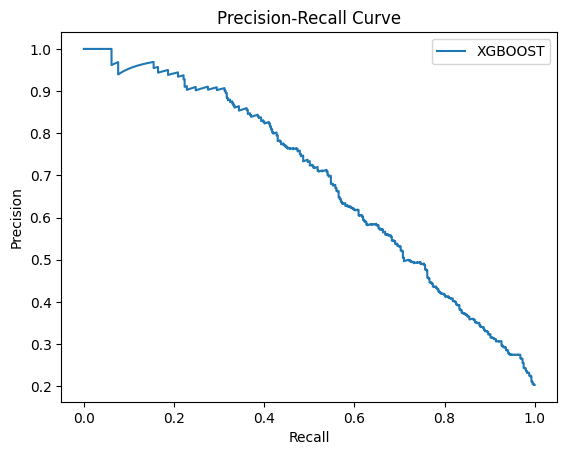

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

xgb_pred = best_model.predict_proba(X_test)[:, 1]

# PR AUC
print("XGBOOST PR AUC:", round(average_precision_score(y_test, xgb_pred),2))

# Plot
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_pred)
plt.plot(rec_xgb, prec_xgb, label="XGBOOST")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

PR AUC Score	Interpretation

0.90 – 1.00	Excellent – high precision and recall

0.75 – 0.90	Very good

0.60 – 0.75	Good – solid performance

0.50 – 0.60	Moderate – room for improvement

< 0.50	    Poor – may miss many positives or misclassify

Based on the PR curve above, the PR-AUC score obtained 0.69, which falls under the “Good - Solid Performance” category.

The score indicates that the Model has a good and solid performance on predicting positive cases correctly at various levels of recall.

**ROC Curve Analysis for Selected Model**

The ROC AUC (Receiver Operating Characteristic - Area Under Curve) measures the model's ability to distinguish between the positive and negative classes across all thresholds. it plots the True Positive Rate against the False positive Rate.

ROC-AUC Score: 0.8501027992553416


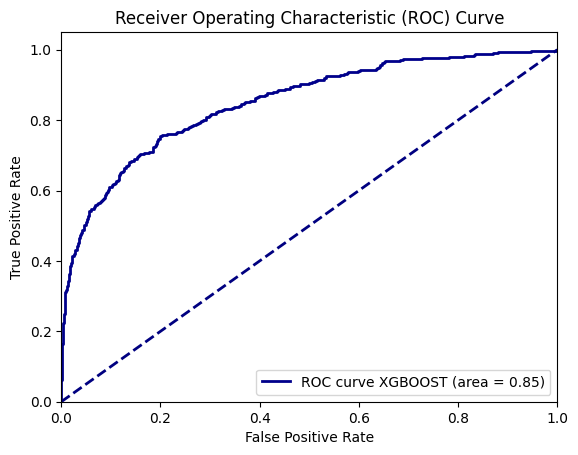

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred)

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_pred)

# Print ROC-AUC Score
print('ROC-AUC Score:', roc_auc_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=2, label=f'ROC curve XGBOOST (area = {roc_auc_xgb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**ROC-AUC Interpretation**

   0.9-1.0 --> Excellent or outstanding

   0.8-0.9 --> Very good

   0.7-0.8 --> Good

   0.6-0.7 --> Fair

   0.5-0.6 --> Poor

   0.5 --> No better than random

   < 0.5 --> Worse than random

Based on the ROC curve above, the ROC-AUC score obtained 0.85, which falls under the “Very Good” category.

The score indicates that the Model has strong discriminative power and performs well in distinguishing between churn and non-churn customers.

**SAVING THE SELECTED MODEL**

In [ ]:
# Save the trained model into the file
import joblib
joblib.dump(selected_model, "selected_model_xgb.pkl")
print("Best Model (XGBOOST) has been saved as selected_model_xgb.pkl")

Best Model (XGBOOST) has been saved as selected_model_xgb.pkl


**Predicting on New Customer Data**

In [ ]:
new_customer_example = pd.DataFrame([{
       'CreditScore': 600,
    'Geography': 'Spain', # Use original category
    'Gender': 'Male',     # Use original category
    'Age': 25,
    'Tenure': 3,
    'Balance': 90000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 750000
}])

new_customer_transformed = ct.transform(new_customer_example.values)

# Find the columns that were standardized during training
# This mask was created earlier in the notebook
mask = (X < 0) | (X > 1)
cols_not_0_1 = np.any(mask, axis=0)
new_customer_transformed[:, cols_not_0_1] = sc.transform(new_customer_transformed[:, cols_not_0_1])


In [ ]:
# Load model
churn_model = joblib.load("selected_model_xgb.pkl")

In [ ]:
churn_prob = churn_model.predict_proba(new_customer_transformed)

churn_pred = churn_model.predict(new_customer_transformed)

label = "Churn" if churn_pred.any == 1 else "Not Churn" # If prediction [0] is 1, it means Churn, if the result is 0 then it means Not Churn
print(f"Prediction: {label}") # Show the prediction result as Churn or Not Churn
print(f'Classes:    {churn_model.classes_}')
print(f"Probability: {churn_prob[0]}") # Show the probability of Churn and Not Churn

#Ranking System to catch categories of chunners
if churn_prob[ : ,1] >= 0.70:
  print('High Risk of Churn')
elif churn_prob[ : ,1] >= 0.40:
  print('Medium Risk of Churn')
else:
  print('Low Risk of Churn')


Prediction: Not Churn
Classes:    [0 1]
Probability: [0.7364975  0.26350248]
Low Risk of Churn


**STREAMLIT APP**

The model has been uploaded to the streamlit app to enable customers make prediction and see ranking of potential chunners with new data.

To access the app, please use the link below.

[Streamlit App](https://bank-customer-churn-mbiupxnckhdxrrgncv76f4.streamlit.app/#bank-customer-churn-prediction-app)
